
... ***CURRENTLY UNDER DEVELOPMENT*** ...


## RBFs validation of synthetic climate change data

inputs required: 
  * Historical nearshore hourly waves
  * Synthetic nearshore hourly waves
  * Synthetic nearshore hourly waves affected by Climate Change (future ENSO probability)

in this notebook:
  * Synthetic and historical waves Extremes
  

In [17]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import numpy as np
import pandas as pd
import xarray as xr

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..', '..'))

# teslakit
from teslakit.database import Database, hyswan_db

from teslakit.plotting.buoy import scatter_QQ, compare_series
from teslakit.plotting.waves import Plot_Waves_Histogram_FitSim
from teslakit.plotting.extremes import Plot_ReturnPeriodValidation_CC



## Database and Site parameters

In [18]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/albacid/Projects/TeslaKit_projects'

# offshore
db = Database(p_data)
db.SetSite('ROI')

# climate change - S5
db_S5 = Database(p_data)
db_S5.SetSite('ROI_CC_S5')

In [20]:
# --------------------------------------
# Load nearshore hourly waves for extremes analysis

# Historical
HIST_N_h = db.Load_HIST_NEARSHORE(decode_times=True)

# Simulation
SIM_N_h = db.Load_SIM_NEARSHORE_all(decode_times=True, use_cftime=True)

# Simulation Climate Change
SIM_N_h_CChange = db_S5.Load_SIM_NEARSHORE_all(decode_times=True, use_cftime=True)



## Methodology Validation: AWL Nearshore - Annual Maxima Return Period

In [12]:
# def. some auxiliar function to select all dataset variables at vn max by groups

def grouped_max(ds, vn=None, dim=None):
    return ds.isel(**{dim: ds[vn].argmax(dim)})


In [13]:
# Historical AWL Annual Maxima

# calculate AWL annual maxima dataset
hist_AMax = HIST_N_h.groupby('time.year').apply(grouped_max, vn='AWL', dim='time')


In [14]:
# Simulation AWL Annual Maxima

# replace nans by 0
SIM_N_nonan = SIM_N_h.fillna(0)
SIM_N_nonan_CChange = SIM_N_h_CChange.fillna(0)

# calculate AWL annual maxima dataset
sim_AMax = SIM_N_nonan.groupby('time.year').apply(grouped_max, vn='AWL', dim='time')
sim_AMax_CChange = SIM_N_nonan_CChange.groupby('time.year').apply(grouped_max, vn='AWL', dim='time')


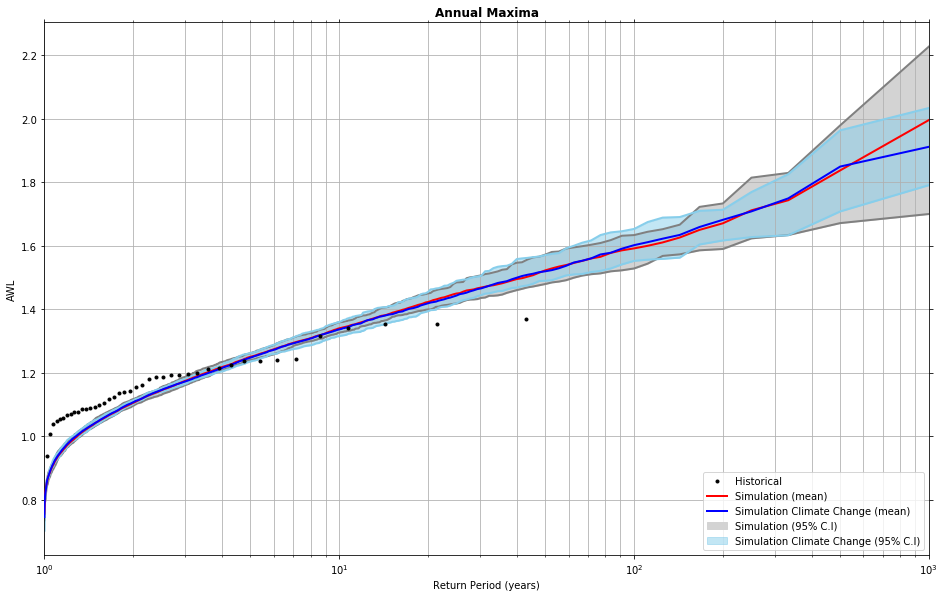

In [15]:
# AWL Annual Maxima Return Period (historical vs. simulations)

Plot_ReturnPeriodValidation_CC(hist_AMax['AWL'], sim_AMax['AWL'].transpose(), sim_AMax_CChange['AWL'].transpose());


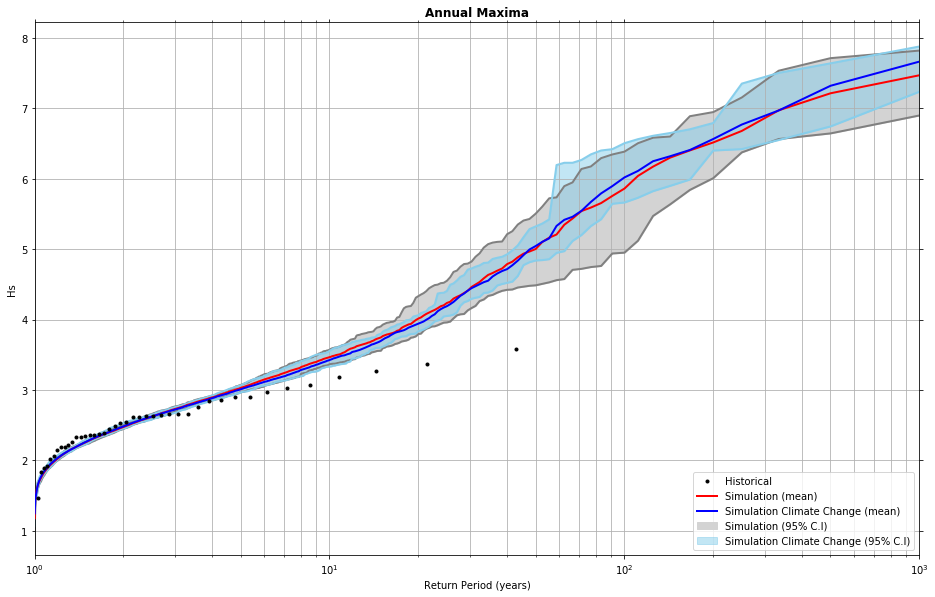

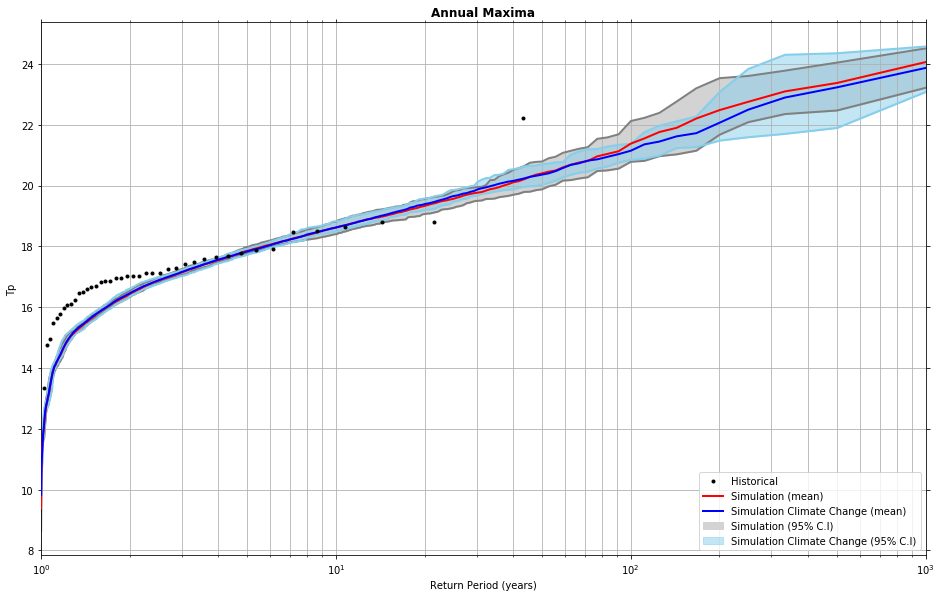

In [16]:
# Hs and Tp Return Period (historical vs. simulations) at AWL Annual Maxima

# Hs at AWL Annual Maxima
Plot_ReturnPeriodValidation_CC(hist_AMax['Hs'], sim_AMax['Hs'].transpose(), sim_AMax_CChange['Hs'].transpose());

# Tp at AWL Annual Maxima
Plot_ReturnPeriodValidation_CC(hist_AMax['Tp'], sim_AMax['Tp'].transpose(), sim_AMax_CChange['Tp'].transpose());



## Hs Nearshore - Annual Maxima Return Period

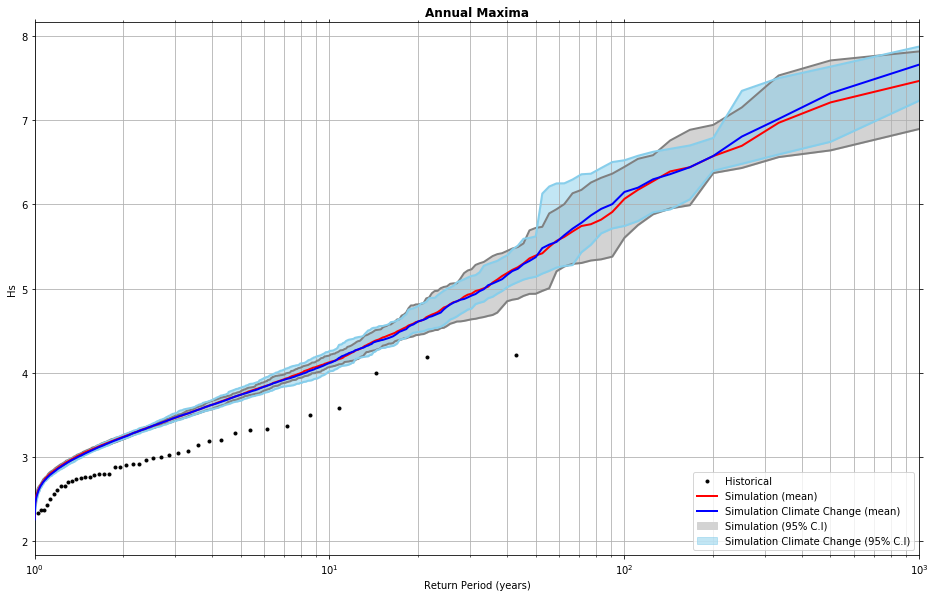

In [21]:
# calculate Annual Maxima values for historical and simulated data
hist_A = HIST_N_h['Hs'].groupby('time.year').max(dim='time')
sim_A = SIM_N_h['Hs'].groupby('time.year').max(dim='time')
sim_B = SIM_N_h_CChange['Hs'].groupby('time.year').max(dim='time')

# Return Period historical vs. simulations
Plot_ReturnPeriodValidation_CC(hist_A, sim_A.transpose(), sim_B.transpose());




## Tp Nearshore - Annual Maxima Return Period

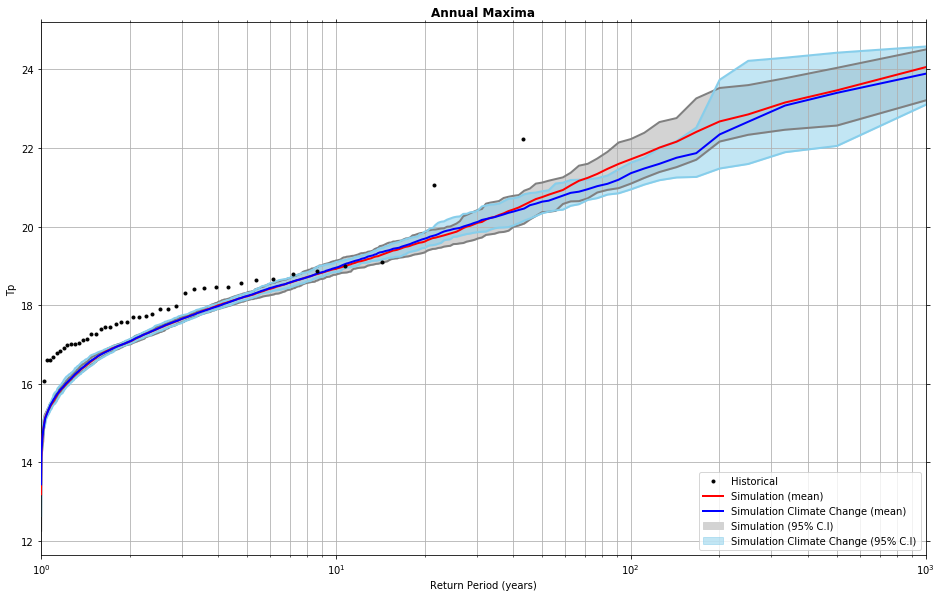

In [22]:
# calculate Annual Maxima values for historical and simulated data
hist_A = HIST_N_h['Tp'].groupby('time.year').max(dim='time')
sim_A = SIM_N_h['Tp'].groupby('time.year').max(dim='time')
sim_B = SIM_N_h_CChange['Tp'].groupby('time.year').max(dim='time')

# Return Period historical vs. simulations
Plot_ReturnPeriodValidation_CC(hist_A, sim_A.transpose(), sim_B.transpose());
